# LSN Esercizi lezione 4
Gloria Senatore 931644

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Esercizio 4.1

#### Svolgimento

L'esercizio verte sul miglioramento di un codice di dinamica molecolare che utilizza l'algoritmo di Verlet per integrare le equazioni del moto. Grazie a tale algoritmo, si ha che, date le posizioni delle molecole al tempo $t$ e $t - \delta t$, le posizioni al tempo $t+\delta t$ sono date da:
$$\vec{r}(t+\delta t) = 2\vec{r}(t)-\vec{r}(t-\delta t)+\frac{\vec{F}(\vec{r})}{m} \delta t^2$$
con $\vec{F}(\vec{r}) = \sum_{i,j}^N \vec{F_{i,j}}(r)$, ossia somma di termini di interazione a coppie. La forza tra due molecole è pari a meno il gradiente del potenziale di Lennard-Jones.

Nella prima parte dell'esercizio si richiede di migliorare il codice inserendo la possibilità di ripartire da una simulazione già svolta, di cui si conosce la configurazione finale al tempo $t$ e quella finale al tempo $t-\delta t$, e di forzare l'equilibrazione del sistema riscalando le velocità per raggiungere una temperatura desiderata

#### Risultati

Si parte da un cristallo fcc, cioè da una configurazione ordinata per evitare situazioni di sovrapposizione di atomi che comporterebbero una lenta convergenza dell'algoritmo di Verlet a causa del core altamente repulsivo a piccola distanza del potenziale di Lennard-Jones. Si riporta di seguito un plot 3D delle posizioni iniziali in unità della cella di simulazione.

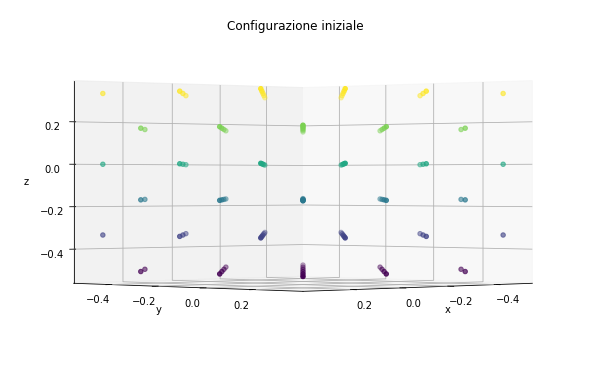

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = np.loadtxt("config.0", usecols=0)
Y = np.loadtxt("config.0", usecols=1)
Z = np.loadtxt("config.0", usecols=2)

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Configurazione iniziale")
ax.view_init(0, 45)
plt.show()

Avviando la simulazione con i parametri tipici di un solido, ossia sovrascrivendo *input.solid* su *input.dat*, si osserva che alla fine le posizioni degli atomi (o molecole) sono variate poco dalla condizione di equilibrio:

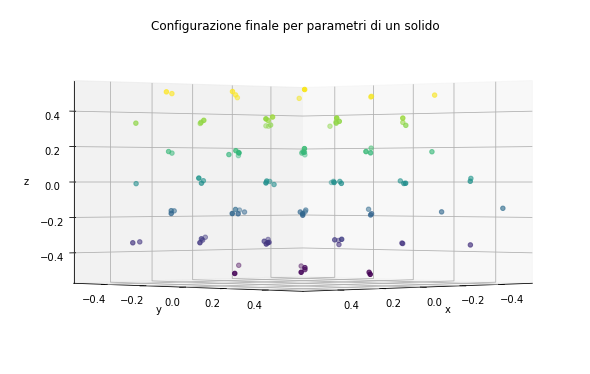

In [3]:
X = np.loadtxt("config.final", usecols=0)
Y = np.loadtxt("config.final", usecols=1)
Z = np.loadtxt("config.final", usecols=2)

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Configurazione finale per parametri di un solido")
ax.view_init(0, 45)
plt.show()

Di seguito si riporta il grafico delle osservabili termodinamiche, energia cinetica per particella, temperatura, energia totale per particelle, energia potenziale per particella, al crescere dei $10000$ step d'integrazione (le misure sono prese ogni $10$ step) ottenuti dal codice non ancora modificato.

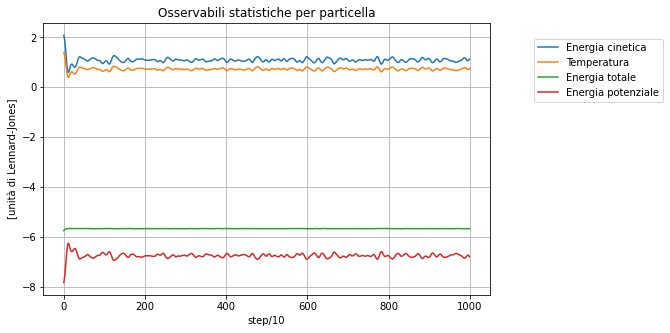

In [4]:
plt.figure(figsize=(8,5))
Etot_start = np.loadtxt("output_etot.dat")
Ekin_start = np.loadtxt("output_ekin.dat")
Epot_start = np.loadtxt("output_epot.dat")
temp_start = np.loadtxt("output_temp.dat")
npart = np.arange(Etot_start.size)

plt.plot(npart,Ekin_start, label='Energia cinetica')
plt.plot(npart,temp_start, label='Temperatura')
plt.plot(npart,Etot_start, label='Energia totale')
plt.plot(npart,Epot_start, label='Energia potenziale')
plt.xlabel('step/10')
plt.ylabel(r'[unità di Lennard-Jones]')
plt.title("Etot start")
plt.grid(True)
plt.legend(loc=(1.1, 0.71), frameon=True)
plt.title("Osservabili statistiche per particella")
plt.show()

Si osserva che in un primo transiente le osservabili presentano una grande fluttuazione e in seguito si assestano attorno ai valori medi, con leggere fluttuazioni per energia cinetica, potenziale e temperatura, e fluttuazioni ancora più deboli per energia totale, per via di un effetto di compensazione tra energia cinetica e potenziale. L'energia potenziale non può che aumentare rispetto alla condizione iniziale poiché il cristallo perfetto è lo stato di minima energia. Come ci si attende dall'ensemble microcanonico, l'energia totale si conserva e le seppur piccolissime fluttuazioni sono dovute al fatto che le equazioni del moto vengono integrate in modo discreto.

Per risolvere il problema del transiente iniziale, viene eseguita un'altra simulazione dell'evoluzione del sistema, questa volta partendo dalla configurazione finale al tempo $t$ e $t - \delta t$ precedenti, ottenute nel codice stampando su file le posizioni $x[i], y[i], z[i]$ e $xold[i], yold[i], zold[i]$ con le funzioni *ConfFinal()* e *ConfFinal_1()*. Per far ripartire la simulazione si ricordi di settare la variabile *restart* nel main a *true*, di sovrascrivere *config.0* con *config.final* e di cancellare i file delle osservabili termodinamiche della simulazione precedente.

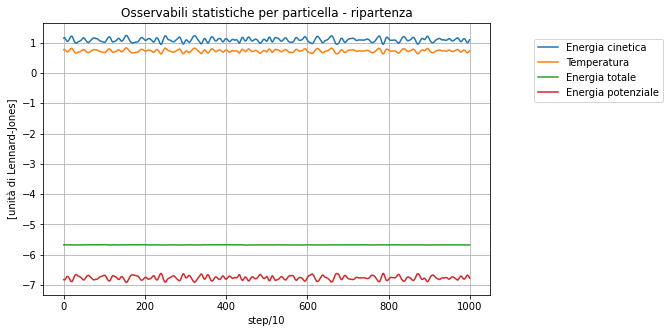

In [5]:
Etot_start = np.loadtxt("output_etot (1).dat")
Ekin_start = np.loadtxt("output_ekin (1).dat")
Epot_start = np.loadtxt("output_epot (1).dat")
temp_start = np.loadtxt("output_temp (1).dat")
npart = np.arange(Etot_start.size)

plt.figure(figsize=(8,5))
plt.plot(npart,Ekin_start, label='Energia cinetica')
plt.plot(npart,temp_start, label='Temperatura')
plt.plot(npart,Etot_start, label='Energia totale')
plt.plot(npart,Epot_start, label='Energia potenziale')
plt.xlabel('step/10')
plt.ylabel(r'[unità di Lennard-Jones]')
plt.title("Etot start")
plt.grid(True)
plt.legend(loc=(1.1, 0.71), frameon=True)
plt.title("Osservabili statistiche per particella - ripartenza")
plt.show()

Si nota che è stato risolto il problema del transiente iniziale e l'energia totale si conserva sempre.

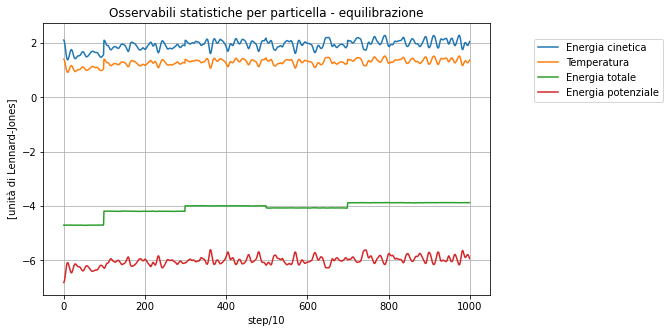

In [6]:
Etot_start = np.loadtxt("output_etot_eq.dat")
Ekin_start = np.loadtxt("output_ekin_eq.dat")
Epot_start = np.loadtxt("output_epot_eq.dat")
temp_start = np.loadtxt("output_temp_eq.dat")
npart = np.arange(Etot_start.size)

plt.figure(figsize=(8,5))
plt.plot(npart,Ekin_start, label='Energia cinetica')
plt.plot(npart,temp_start, label='Temperatura')
plt.plot(npart,Etot_start, label='Energia totale')
plt.plot(npart,Epot_start, label='Energia potenziale')
plt.xlabel('step/10')
plt.ylabel(r'[unità di Lennard-Jones]')
plt.title("Etot start")
plt.grid(True)
plt.legend(loc=(1.1, 0.71), frameon=True)
plt.title("Osservabili statistiche per particella - equilibrazione")
plt.show()

Il grafico mostra l'equilibrazione del sistema, ottenuta riscalando le velocità agli step numero $1$, $1000$, $3000$, $5000$ e $7000$ e lasciando il sistema libero di evolvere con Verlet negli step restanti. Nella fase di equilibrazione si calcola la velocità $\vec{v}(t+\delta t/2)$ con la relazione: $$\vec{v}(t+\delta t/2) = \frac{\vec{r}(t+\delta t)-\vec{r}(t)}{\delta t}$$
e la temperatura $T(t+\delta t/2)$ con: $$T(t+\delta t/2) = \frac{|\vec{v}(t+\delta t/2)|^2}{N}$$ con $N$ numero delle particelle del sistema.

Le velocità $\vec{v}(t)$ vengono riscalate in questo modo: $$\vec{v}(t) = \vec{v}(t) \cdot \sqrt{\frac{3 T^*}{T(t+\delta t/2)}}$$
e la configurazione spaziale al tempo $t$ diventa: $$\vec{r}(t) = \vec{r}(t+\delta t) - \delta t \vec{v}(t)$$

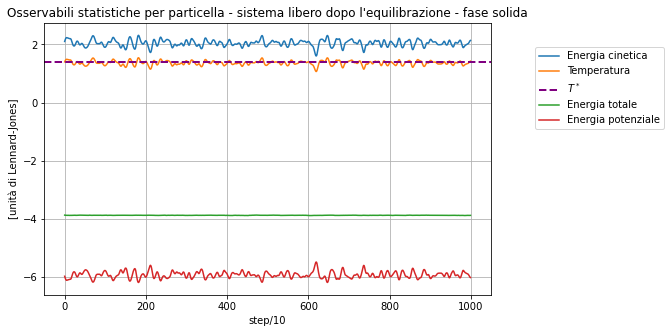

In [2]:
Etot_start = np.loadtxt("output_etot_posteq.dat")
Ekin_start = np.loadtxt("output_ekin_posteq.dat")
Epot_start = np.loadtxt("output_epot_posteq.dat")
temp_start = np.loadtxt("output_temp_posteq.dat")
npart = np.arange(Etot_start.size)

plt.figure(figsize=(8,5))
plt.plot(npart,Ekin_start, label='Energia cinetica')
plt.plot(npart,temp_start, label='Temperatura')
plt.axhline(1.4, color='purple', lw=2, ls='--', label='$T^*$')
plt.plot(npart,Etot_start, label='Energia totale')
plt.plot(npart,Epot_start, label='Energia potenziale')
plt.xlabel('step/10')
plt.ylabel(r'[unità di Lennard-Jones]')
plt.title("Etot start")
plt.grid(True)
plt.legend(loc=(1.1, 0.61), frameon=True)
plt.title("Osservabili statistiche per particella - sistema libero dopo l'equilibrazione - fase solida")
plt.show()

Dopo l'equilibrazione, lasciando muovere il sistema con Verlet senza più interferire riscalando le velocità, si osserva che la temperatura si è assestata attorno alla $T^* = 1.4$ desiderata, rappresentata nel grafico dalla retta tratteggiata.

Si riportano di seguito i risultati ottenuti dopo l'equilibrazione di fase liquida e gassosa:

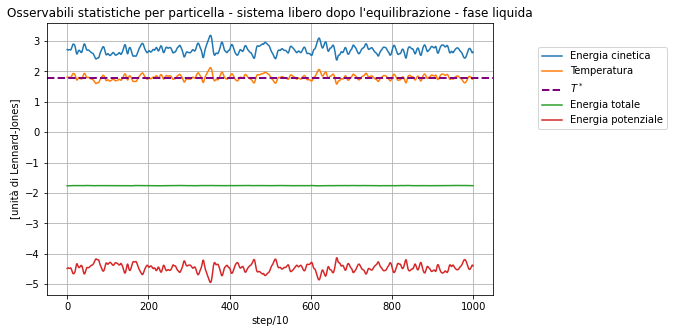

In [3]:
Etot_start = np.loadtxt("output_etot_posteql.dat")
Ekin_start = np.loadtxt("output_ekin_posteql.dat")
Epot_start = np.loadtxt("output_epot_posteql.dat")
temp_start = np.loadtxt("output_temp_posteql.dat")
npart = np.arange(Etot_start.size)

plt.figure(figsize=(8,5))
plt.plot(npart,Ekin_start, label='Energia cinetica')
plt.plot(npart,temp_start, label='Temperatura')
plt.axhline(1.8, color='purple', lw=2, ls='--', label='$T^*$')
plt.plot(npart,Etot_start, label='Energia totale')
plt.plot(npart,Epot_start, label='Energia potenziale')
plt.xlabel('step/10')
plt.ylabel(r'[unità di Lennard-Jones]')
plt.title("Etot start")
plt.grid(True)
plt.legend(loc=(1.1, 0.61), frameon=True)
plt.title("Osservabili statistiche per particella - sistema libero dopo l'equilibrazione - fase liquida")
plt.show()

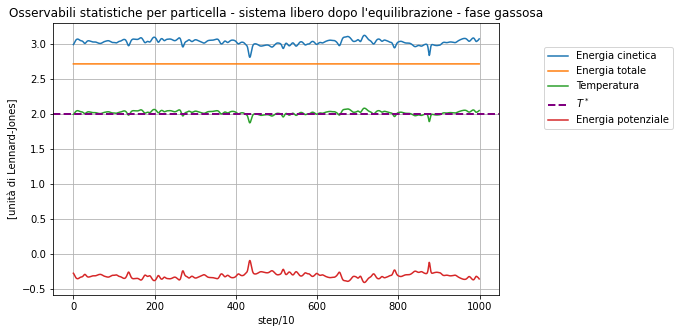

In [16]:
Etot_start = np.loadtxt("output_etot_posteqg.dat")
Ekin_start = np.loadtxt("output_ekin_posteqg.dat")
Epot_start = np.loadtxt("output_epot_posteqg.dat")
temp_start = np.loadtxt("output_temp_posteqg.dat")
npart = np.arange(Etot_start.size)

plt.figure(figsize=(8,5))
plt.plot(npart,Ekin_start, label='Energia cinetica')
plt.plot(npart,Etot_start, label='Energia totale')
plt.plot(npart,temp_start, label='Temperatura')
plt.axhline(2, color='purple', lw=2, ls='--', label='$T^*$')
plt.plot(npart,Epot_start, label='Energia potenziale')
plt.xlabel('step/10')
plt.ylabel(r'[unità di Lennard-Jones]')
plt.title("Etot start")
plt.grid(True)
plt.legend(loc=(1.1, 0.61), frameon=True)
plt.title("Osservabili statistiche per particella - sistema libero dopo l'equilibrazione - fase gassosa")
plt.show()

### Esercizio 4.2

#### Svolgimento

Si migliora ulteriormente il codice inserendo il *block averaging*. Si sceglie un numero di blocchi pari a $100$ e un numero di step in ogni blocco pari a $1000$.

#### Risultati

Si riportano i grafici delle medie progressive e incertezze delle osservabili termodinamiche in funzione del numero di blocchi. Viene simulata la dinamica di molecole con i parametri di una fase solida. Prima di registrare i valori delle grandezze in studio, il sistema viene equilibrato. Le grandezze sugli assi delle ordinate sono in unità ridotte, o di Lennard-Jones.

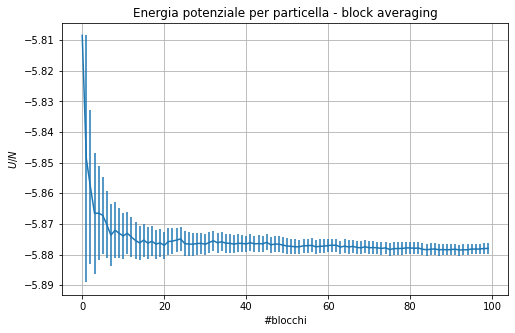

In [60]:
x=np.arange(100)
epot = np.loadtxt("ave_epot.out", usecols=2)
err_epot = np.loadtxt("ave_epot.out", usecols=3)

plt.figure(figsize=(8,5))
plt.errorbar(x,epot,yerr=err_epot)
plt.xlabel('#blocchi')
plt.ylabel(r'$U/N$')
plt.title("Energia potenziale per particella - block averaging")
plt.grid(True)
plt.show()

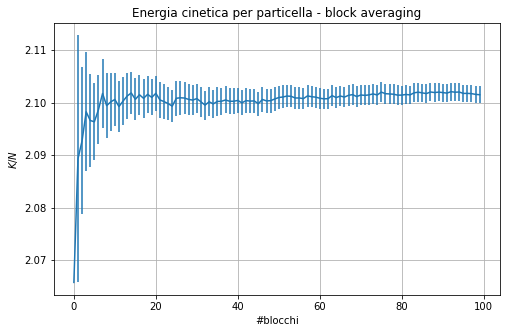

In [61]:
ekin = np.loadtxt("ave_ekin.out", usecols=2)
err_ekin = np.loadtxt("ave_ekin.out", usecols=3)

plt.figure(figsize=(8,5))
plt.errorbar(x,ekin,yerr=err_ekin)
plt.xlabel('#blocchi')
plt.ylabel(r'$K/N$')
plt.title("Energia cinetica per particella - block averaging")
plt.grid(True)
plt.show()

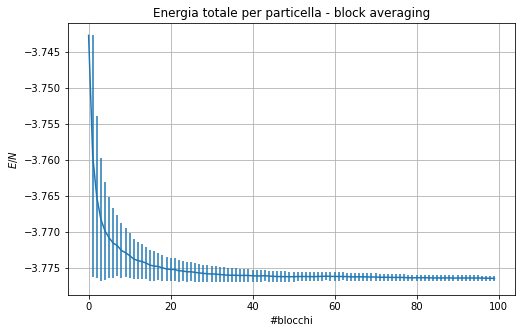

In [62]:
etot = np.loadtxt("ave_etot.out", usecols=2)
err_etot = np.loadtxt("ave_etot.out", usecols=3)

plt.figure(figsize=(8,5))
plt.errorbar(x,etot,yerr=err_etot)
plt.xlabel('#blocchi')
plt.ylabel(r'$E/N$')
plt.title("Energia totale per particella - block averaging")
plt.grid(True)
plt.show()

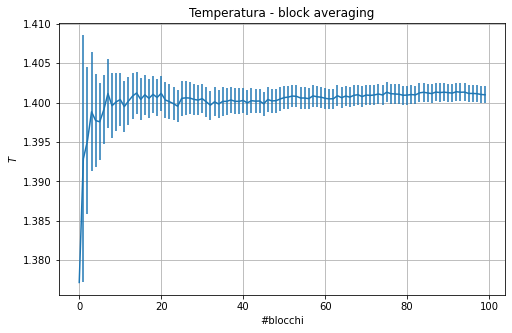

In [63]:
temp = np.loadtxt("ave_temp.out", usecols=2)
err_temp = np.loadtxt("ave_temp.out", usecols=3)

plt.figure(figsize=(8,5))
plt.errorbar(x,temp,yerr=err_temp)
plt.xlabel('#blocchi')
plt.ylabel(r'$T$')
plt.title("Temperatura - block averaging")
plt.grid(True)
plt.show()

Si osserva che i dati convergono correttamente con le incertezze statistiche che diminuiscono all'aumentare del numero di blocchi considerati.

### Esercizio 4.3

#### Svolgimento

Si operano ora le simulazioni della dinamica molecolare di atomi di argon in fase solida, liquida e gassosa. Il sistema parte sempre dalla struttura solida fcc, viene lasciato libero di muoversi per $10000$ step con equilibrazione agli step $1$, $1000$, $3000$, $5000$ e $7000$. Viene eseguita la media a blocchi con $1000$ step in ognuno dei $100$ blocchi.

Devono essere ovviamente cambiati i parametri in *input.dat* con quelli dell'argon con $\delta t^*$ pari ora a $0.00005$ (perché $\delta t^* = \delta t \sqrt{\frac{\epsilon}{m \sigma^2}}$ e $\delta t = 109$ fs).

In [19]:
epsilon_on_kB = 120
epsilon = 1.6567788 * 10**(-21)

#### Risultati

Di seguito i risultati relativi alle simulazioni del sistema nelle tre fasi. Le grandezze sono espresse in unità SI moltiplicando le energie per $\epsilon$ e la temperatura per $\epsilon/k_{b}$.

##### Fase solida

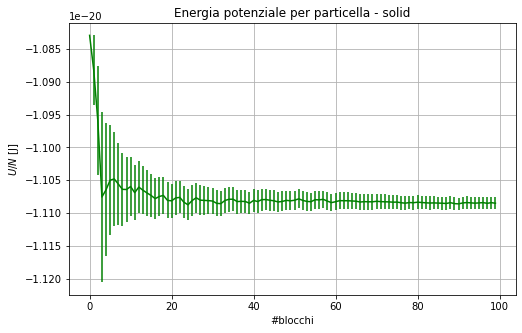

In [56]:
epot = np.loadtxt("ave_epot_solid.out", usecols=2)*epsilon
err_epot = np.loadtxt("ave_epot_solid.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,epot,yerr=err_epot, color='green')
plt.xlabel('#blocchi')
plt.ylabel(r'$U/N$ [J]')
plt.title("Energia potenziale per particella - solid")
plt.grid(True)
plt.show()

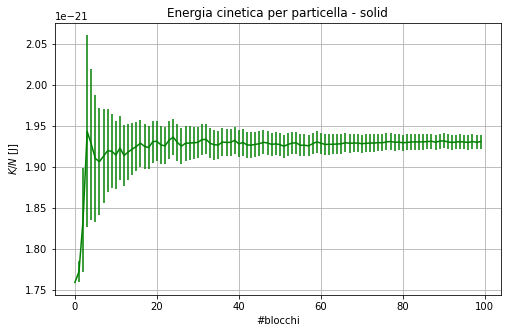

In [57]:
ekin = np.loadtxt("ave_ekin_solid.out", usecols=2)*epsilon
err_ekin = np.loadtxt("ave_ekin_solid.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,ekin,yerr=err_ekin, color='green')
plt.xlabel('#blocchi')
plt.ylabel(r'$K/N$ [J]')
plt.title("Energia cinetica per particella - solid")
plt.grid(True)
plt.show()

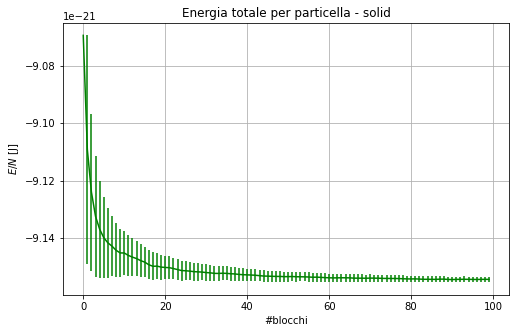

In [58]:
etot = np.loadtxt("ave_etot_solid.out", usecols=2)*epsilon
err_etot = np.loadtxt("ave_etot_solid.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,etot,yerr=err_etot, color='green')
plt.xlabel('#blocchi')
plt.ylabel(r'$E/N$ [J]')
plt.title("Energia totale per particella - solid")
plt.grid(True)
plt.show()

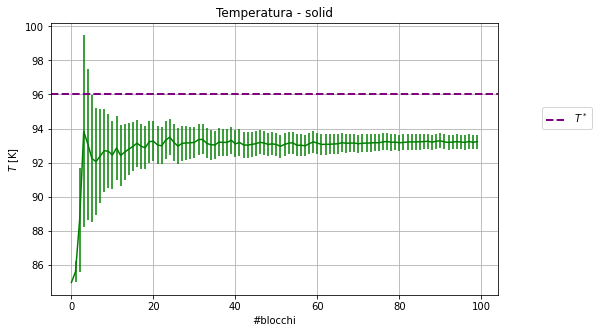

In [59]:
temp = np.loadtxt("ave_temp_solid.out", usecols=2)*epsilon_on_kB
err_temp = np.loadtxt("ave_temp_solid.out", usecols=3)*epsilon_on_kB

plt.figure(figsize=(8,5))
plt.errorbar(x,temp,yerr=err_temp, color='green')
plt.xlabel('#blocchi')
plt.ylabel(r'$T$ [K]')
plt.axhline(0.8*epsilon_on_kB, color='purple', lw=2, ls='--', label='$T^*$')
plt.title("Temperatura - solid")
plt.grid(True)
plt.legend(loc=(1.1, 0.61), frameon=True)
plt.show()

Si ottiene un'energia potenziale dell'ordine del decimo di eV, come atteso per cristalli di gas nobili e un'energia cinetica molto minore. Si osserva che il sistema si è leggermente allontanato dalla temperatura $T^*$ pari a $0.8$, ossia $96$ K, in questo caso.

##### Fase liquida

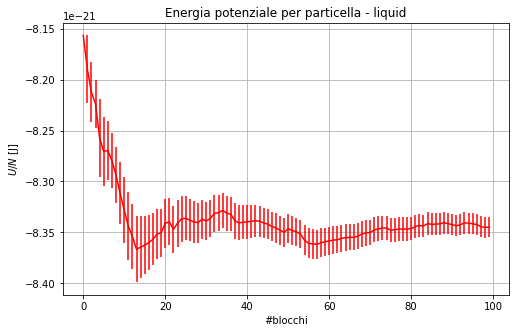

In [37]:
epot = np.loadtxt("ave_epot_liquid.out", usecols=2)*epsilon
err_epot = np.loadtxt("ave_epot_liquid.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,epot,yerr=err_epot, color='red')
plt.xlabel('#blocchi')
plt.ylabel(r'$U/N$ [J]')
plt.title("Energia potenziale per particella - liquid")
plt.grid(True)
plt.show()

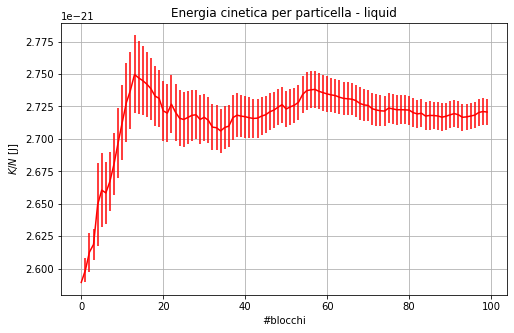

In [38]:
ekin = np.loadtxt("ave_ekin_liquid.out", usecols=2)*epsilon
err_ekin = np.loadtxt("ave_ekin_liquid.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,ekin,yerr=err_ekin, color='red')
plt.xlabel('#blocchi')
plt.ylabel(r'$K/N$ [J]')
plt.title("Energia cinetica per particella - liquid")
plt.grid(True)
plt.show()

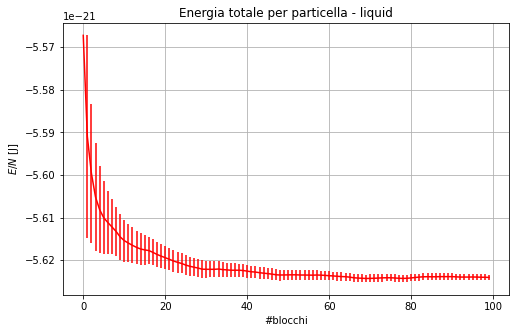

In [39]:
etot = np.loadtxt("ave_etot_liquid.out", usecols=2)*epsilon
err_etot = np.loadtxt("ave_etot_liquid.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,etot,yerr=err_etot, color='red')
plt.xlabel('#blocchi')
plt.ylabel(r'$E/N$ [J]')
plt.title("Energia totale per particella - liquid")
plt.grid(True)
plt.show()

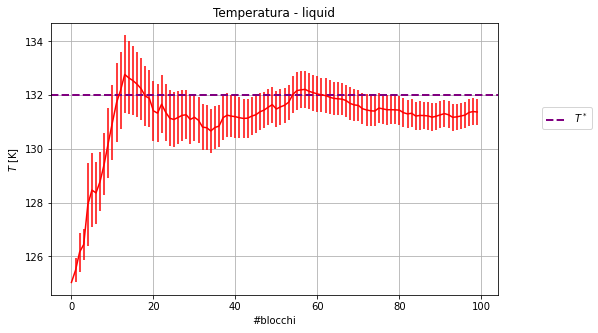

In [40]:
temp = np.loadtxt("ave_temp_liquid.out", usecols=2)*epsilon_on_kB
err_temp = np.loadtxt("ave_temp_liquid.out", usecols=3)*epsilon_on_kB

plt.figure(figsize=(8,5))
plt.errorbar(x,temp,yerr=err_temp, color='red')
plt.xlabel('#blocchi')
plt.ylabel(r'$T$ [K]')
plt.title("Temperatura - liquid")
plt.axhline(1.1*epsilon_on_kB, color='purple', lw=2, ls='--', label='$T^*$')
plt.legend(loc=(1.1, 0.61), frameon=True)
plt.grid(True)
plt.show()

Nella fase liquida si osserva che energia cinetica e potenziale sono confrontabili. Al progredire del numero di blocchi vi è una maggior variazione dei valori delle grandezze rispetto a quanto avviene nella fase solida. Ciò può essere dovuto al fatto che le medie delle osservabili termodinamiche nei vari blocchi fluttuano più lentamente nella fase liquida, con il risultato che le medie progressive sui primi blocchi risultano abbastanza diversa dalle medie progressive su tutti i blocchi.

##### Fase gassosa

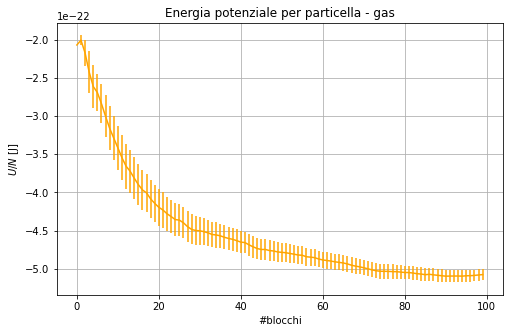

In [44]:
epot = np.loadtxt("ave_epot_gas.out", usecols=2)*epsilon
err_epot = np.loadtxt("ave_epot_gas.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,epot,yerr=err_epot, color='orange')
plt.xlabel('#blocchi')
plt.ylabel(r'$U/N$ [J]')
plt.title("Energia potenziale per particella - gas")
plt.grid(True)
plt.show()

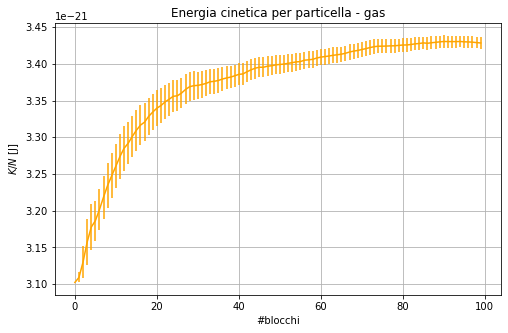

In [45]:
ekin = np.loadtxt("ave_ekin_gas.out", usecols=2)*epsilon
err_ekin = np.loadtxt("ave_ekin_gas.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,ekin,yerr=err_ekin, color='orange')
plt.xlabel('#blocchi')
plt.ylabel(r'$K/N$ [J]')
plt.title("Energia cinetica per particella - gas")
plt.grid(True)
plt.show()

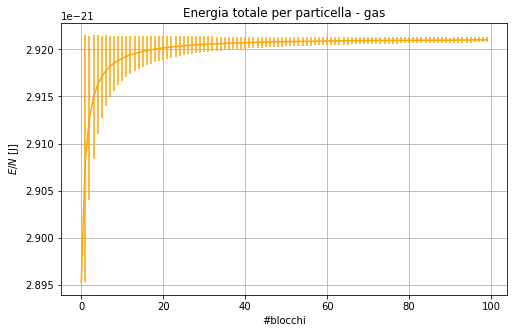

In [46]:
etot = np.loadtxt("ave_etot_gas.out", usecols=2)*epsilon
err_etot = np.loadtxt("ave_etot_gas.out", usecols=3)*epsilon

plt.figure(figsize=(8,5))
plt.errorbar(x,etot,yerr=err_etot, color='orange')
plt.xlabel('#blocchi')
plt.ylabel(r'$E/N$ [J]')
plt.title("Energia totale per particella - gas")
plt.grid(True)
plt.show()

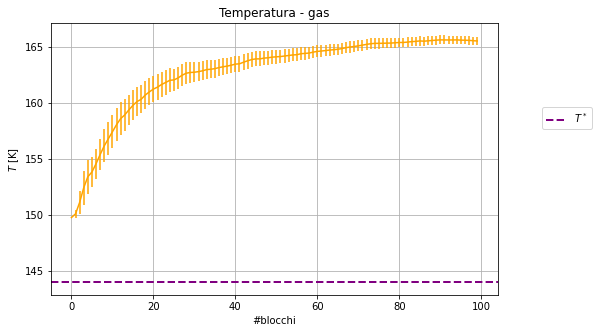

In [47]:
temp = np.loadtxt("ave_temp_gas.out", usecols=2)*epsilon_on_kB
err_temp = np.loadtxt("ave_temp_gas.out", usecols=3)*epsilon_on_kB

plt.figure(figsize=(8,5))
plt.errorbar(x,temp,yerr=err_temp, color='orange')
plt.xlabel('#blocchi')
plt.ylabel(r'$T$ [K]')
plt.title("Temperatura - gas")
plt.axhline(1.2*epsilon_on_kB, color='purple', lw=2, ls='--', label='$T^*$')
plt.legend(loc=(1.1, 0.61), frameon=True)
plt.grid(True)
plt.show()

Il contributo dell'energia cinetica è ora dominante e le variazioni di energia potenziale, cinetica e temperatura all'aumentare degli step di integrazione sono molto evidenti. Nella fase gassosa i valori delle osservabili termodinamiche fluttuano ancora più lentamente. Si osserva che il sistema si è piuttosto allontanato dalla temperatura target $T^*$. L'energia totale si conserva correttamente, come anche nelle simulazioni precedenti.